# Final Project 

Summary |
In this project I will be taking macro economic data and corrolating that back to an investment portfolio. This portfolio includes stocks, bonds, and etfs. The portfolio I will be looking at is the NDSU student managed Bison Fund. The Bison Fund has a core satellite strategy that focuses on a passive index investing in the core and activily managed satellite smid strategy. The Fund reports quarterly and in these report include macro economic data impacting their portfolio. 

Goal |
The goal is to be able to analze what 5 indicators are most correlated with the portfolio and what five are most correlated with individual holdings. Then automating the process to do stress test, and sensitivity analysis on the portfolio to see how effective these indicators are at predicting performance. The end product will be pasted in user freindly spreadsheats and PDFs for executives to pull.

### The Funds current Holdings
Hodlings | 
* TREX
* STMP
* ENPH
* IPGP
* NICE
* TNC
* MANH
* CYBR
* SNA 
* PLNT 
* THO 
* AMN
* VAR
* WEX
* RHI
* VFSUX 
* VHYAX
* VOO


### Data 
Data | I pulled company earnings using yahoo finance and economic data from Federal Reserves Economic Database (FRED). Using APIs I will be able to automate the data collection and analysis. 



In [1]:
#plots.py
import os
import pandas
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import datetime
import math

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    plot_vars = list(df.keys())
    for var1 in plot_vars:
        for var2 in plot_vars:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(plot_vars).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def plot_lines(df, title = False, linewidth = 1, figsize = (40,20), full_index = False, 
               h_line = False, max_y = False, legend = True, pp = None, show_inversion = False):
    fig, ax = plt.subplots(figsize = figsize)
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
    if h_line != False:
        ax.axhline(h_line, ls = "--", linewidth = 1.5, color = "k")
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    if max_y != False:
        ax.set_ylim(bottom = 0, top = max_y)
    if full_index:
        plt.xticks([i for i in range(len(df.index))], list(df.index))
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 

    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 
    if title != False:
        plt.title(title, fontsize = 72)

    if show_inversion:
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        ax.fill_between(df.index, 0, df.max().max(), where=df["2 Y (%)"] < df["1 M (%)"],
                    facecolor='red', alpha=0.2, transform = trans)
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    plt.savefig(filename[:50] + " line.png",
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20), 
                       pp = None, total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
#    mpl_colors = ["C" + str(i) for i in range(11)]
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = "k",
              label = total_var, ls = "--")
    ax.legend(loc=2, ncol = 2)

### The list of all my econonmic indicators used in this report.

> This includes, interest rates, inflation, consumer sentiment, employment, housing, consumption, GDP, etc.

In [7]:
# This is my reference code to configure all the shortcuts of my data. 

data_codes  = {"Base: Total ($ Mil)": "BOGMBASEW",
               "Base: Currency in Circulation ($ Mil)": "MBCURRCIRW",
              
               # Interest Rates
               "IOER (%)":"IOER",
               "EFFR (%)": "DFF",
               "Bank Prime Loan Rate (%)" : "MPRIME",
               
              # Inflation 
              "Expected Inflation (%)":"T10YIE",
              "Inflation (%)": "CPIAUCSL",
              "Consumer Price Index for All Urban Consumers" : "CPIOGSNS",
              "Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average" : "CPILFENS",
                            
               # Work Week
               "Manufacturing Workweek (Hours)": "AWHMAN",
               "Construction Workweek (Hours)": "AWHAECON",
               
               # Consumer Sentiment
               "Consumer Sentiment (Index)" : "UMCSENT",
               "Personal Income" : "PI",
               "Personal current transfer payments" : "W211RC1",
               "Real Disposable Personal Income ($B)" : "DSPIC96",
               "Nonfinancial Corporate Business: Profits After Tax ($B)" : "NFCPATAX",
    
               # Durable Goods
               "Durable Goods Orders (millions)" : "DGORDER",
               "Personal Consumption Expenditures (Index)" : "PCECTPI",
    
               #Financial Conditions
               "Chicago Fed National Financial Conditions Index (Index)" : "NFCINONFINLEVERAGE",
               "S&P 500 Stock Price Index ($)" : "SP500",
               "recessions" : "JHDUSRGDPBR",
               "Corporate Profits After Tax ($B)" : "CP",
               
               # Employment 
               "4-Week Moving Average of Initial Claims" : "IC4WSA",
               "Median Weeks Unemployed (Weeks)" : "UEMPMED",
               "Labor Force Participation Rate (%)" : "CIVPART",
               "Total Unemployed, Plus All Persons Marginally Attached to the Labor Force, Plus Total Employed Part Time for Economic Reasons, as a Percent of the Civilian Labor Force Plus All Persons Marginally Attached to the Labor Force (%)" : "U6RATE",
               "Unemployment Rate (%)" : "UNRATE",
               "Hires: Total Nonfarm" : "JTSHIL",
               "All Employees, Total Nonfarm (Thousands of Persons)" : "PAYEMS",
               "Compensation of Employees, Received: Wage and Salary Disbursements ($B)" : "A576RC1",
               
               # New Construction Progress
               "New Private Housing Units Authorized by Building Permits" : "PERMIT",
               "Industrial Production: Total Index" : "INDPRO",
               "Manufacturers New Orders:" : "NEWORDER",
               
               # GDP
               "Real Gross Domestic Product ($B)" : "GDPC1",
               "Chicago Fed National Activity Index" : "CFNAI",
               
               # Commodity Prices 
               "US All Grades All Formulations Gas Price ($ per Gallon)" : "GASALLM",
                              
               # Miscellaneous
               "Retail Sales: Retail and Food Services (Millions ($))" : "RSAFS",
               "Commercial and Industrial Loans, All Commercial Banks ($B)" : "BUSLOANS",
               "Total Consumer Credit Owned and Securitized, Outstanding ($B)" : "TOTALSL",
               "Total Business: Inventories to Sales Ratio" : "ISRATIO",
               "Total Consumer Credit Owned and Securitized, Outstanding ($B)" : "TOTALNS",
               "Business Sector: Unit Labor Cost" : "ULCBS",               
               "Federal Debt: Total Public Debt ($M)" : "GFDEBTN",
               "Households and Nonprofit Organizations; Debt Securities and Loans; Liability, Level ($B)" : "CMDEBT",
               "M2 Money Stock ($B)" : "M2",
               "Velocity of M2 Money Stock" : "M2V"}
               
# Select start and end dates
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

In [8]:
data = pandas.DataFrame(data)
data.to_csv('Indicator_Data.csv') 
data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),IOER (%),EFFR (%),Bank Prime Loan Rate (%),Expected Inflation (%),Inflation (%),Consumer Price Index for All Urban Consumers,Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average,Manufacturing Workweek (Hours),...,US All Grades All Formulations Gas Price ($ per Gallon),Retail Sales: Retail and Food Services (Millions ($)),"Commercial and Industrial Loans, All Commercial Banks ($B)","Total Consumer Credit Owned and Securitized, Outstanding ($B)",Total Business: Inventories to Sales Ratio,Business Sector: Unit Labor Cost,Federal Debt: Total Public Debt ($M),"Households and Nonprofit Organizations; Debt Securities and Loans; Liability, Level ($B)",M2 Money Stock ($B),Velocity of M2 Money Stock
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-31,3348160.20,1709064.80,2.400000,2.400000,5.50,1.793810,252.550,446.000,260.122,42.0,...,2.338,505036,2321.2736,4009.67837,1.40,111.116,22027880.0,15555.757,14432.175,1.459
2019-02-28,3350748.50,1707784.50,2.400000,2.400000,5.50,1.876842,253.181,448.150,261.114,41.7,...,2.393,504686,2328.6361,3994.67229,1.40,NaN,NaN,NaN,14461.075,NaN
2019-03-31,3388656.50,1719262.50,2.400000,2.405161,5.50,1.912857,254.095,448.471,261.836,41.7,...,2.594,512602,2339.5740,3988.51082,1.38,NaN,NaN,NaN,14501.075,NaN
2019-04-30,3312633.50,1726409.00,2.400000,2.423667,5.50,1.936667,254.943,448.658,262.332,41.6,...,2.881,515088,2335.4875,4008.50833,1.39,110.964,22023283.0,15708.445,14555.840,1.454
2019-05-31,3235396.80,1732333.20,2.351613,2.390968,5.50,1.826364,255.167,449.896,262.590,41.5,...,2.946,516913,2338.8191,4032.37820,1.40,NaN,NaN,NaN,14642.150,NaN
2019-06-30,3282619.00,1738510.50,2.350000,2.377667,5.50,1.700000,255.402,449.345,263.177,41.6,...,2.804,518397,2346.1829,4040.94801,1.39,NaN,NaN,NaN,14764.075,NaN
2019-07-31,3255978.40,1746192.00,2.350000,2.402903,5.50,1.752727,256.087,451.709,263.566,41.5,...,2.823,521831,2357.0760,4063.25319,1.39,110.878,22719402.0,15834.851,14853.540,1.442
2019-08-31,3275209.00,1749115.50,2.100000,2.125806,5.25,1.586364,256.294,453.074,264.169,41.5,...,2.707,524477,2373.3587,4104.22860,1.39,NaN,NaN,NaN,14925.450,NaN
2019-09-30,3197323.50,1762662.00,1.980000,2.043000,5.15,1.587000,256.593,453.193,264.522,41.5,...,2.681,521335,2370.0226,4117.46423,1.39,NaN,NaN,NaN,15015.700,NaN


### Here is the statistics I will be tracking. 

##### Statistics Meaning:
> Mean | is the average. It is the sum / n

> Median | is the number in the middle of n

> Variance | is the distribution of n, it explains how random variables differ from expected

> S.D. | measures the volatility of a data set, it is the square root of the variance

> Skewness | refers to the distortion of normal distrinbution in a data set. It describes the appeanance.

> Kurtosis | describes the weight of a distribution that is held in the tails.

In [37]:
# Here is the code for creating the statistics I am tracking for my companies

# this is the total number of observations
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

# Finds the average for each data set
def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_ 

# find the median of each data set
def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1]) 
    return median_

#Find the mode of each data set
def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    return mode_

# Finds the variaence of each data set
def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    return variance_

# Finds the Standerd Deviation of each data set
def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    return SD_

# FInds the covariance of each of data set
def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)

# Finds the correlation of each data set
def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

# Finds the skewness of the data set
def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    # insert variables into formula
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / n if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
    return skew

#Finds the Kurtosis of each data set
def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    return kurt

In [39]:
# This summarizes the statistics we are tracking
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)  
    return stats_df

In [40]:
# This is a template we loaded to graph and summarize data
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2019, 1 , 1)
end = datetime.datetime.today()

# Creating a dictionary for our data
data_dict = {}
stocks = ["TREX", "STMP", "ENPH", "IPGP", "NICE", "TNC", "MANH", "CYBR", "SNA", 
          "PLNT", "THO", "AMN", "VAR", "WEX", "RHI", "VFSUX", "VHYAX", "VOO"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [41]:
# This is summarizing the closing price of the stocks we are tracking in our dictionary into a table
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)

close_data = pandas.DataFrame(close_data)
close_data.to_csv('close_data.csv') 

close_data

,TREX,STMP,ENPH,IPGP,NICE,TNC,MANH,CYBR,SNA,PLNT,THO,AMN,VAR,WEX,RHI,VFSUX,VHYAX,VOO
Date,,,,,,,,,,,,,,,,,,
2019-01-02,30.514999,150.669998,4.920000,114.760002,106.849998,52.740002,42.189999,73.239998,147.460007,53.580002,52.240002,55.650002,112.669998,138.720001,56.540001,10.45,NaN,229.990005
2019-01-03,30.389999,147.970001,4.760000,108.599998,104.959999,51.189999,41.189999,69.910004,145.460007,52.799999,51.160000,54.410000,109.800003,134.580002,52.900002,10.47,NaN,224.500000
2019-01-04,32.020000,154.690002,5.080000,114.720001,107.730003,52.720001,42.599998,69.419998,150.770004,54.919998,54.099998,55.919998,118.650002,141.940002,56.090000,10.45,NaN,231.910004
2019-01-07,32.514999,161.570007,5.260000,116.809998,107.309998,53.610001,43.349998,72.779999,152.699997,55.840000,56.820000,55.049999,121.930000,144.679993,55.900002,10.44,NaN,233.649994
2019-01-08,33.250000,162.020004,5.350000,120.800003,107.750000,54.930000,44.700001,77.730003,154.649994,57.619999,57.380001,58.349998,122.620003,150.570007,57.340000,10.43,NaN,235.919998
2019-01-09,34.049999,167.000000,5.630000,126.269997,106.419998,55.139999,45.230000,77.320000,157.759995,58.310001,60.500000,59.310001,123.330002,155.000000,58.330002,10.44,NaN,237.009995
2019-01-10,33.945000,171.750000,5.630000,128.520004,107.239998,56.250000,45.080002,78.580002,160.110001,58.630001,59.630001,59.810001,124.040001,155.940002,58.189999,10.44,NaN,238.000000
2019-01-11,34.119999,172.199997,5.680000,127.879997,107.620003,56.400002,45.750000,77.919998,160.330002,58.799999,59.720001,60.830002,125.650002,155.630005,58.380001,10.45,NaN,237.889999
2019-01-14,33.415001,170.610001,5.820000,127.110001,103.760002,55.590000,45.240002,77.080002,162.130005,57.220001,62.200001,61.160000,123.720001,154.960007,58.299999,10.45,NaN,236.580002


In [42]:
# this command is showing the statistics of the stocks we are following in our dictionary 
price_change_data = close_data.pct_change() * 100
stats_df = gather_statistics(price_change_data)
stats_df

,TREX,STMP,ENPH,IPGP,NICE,TNC,MANH,CYBR,SNA,PLNT,THO,AMN,VAR,WEX,RHI,VFSUX,VHYAX,VOO
S.D.,3.424,6.211,5.762,3.144,1.917,2.835,3.280,3.087,2.475,4.007,3.882,2.982,2.441,3.830,2.618,0.143,1.710,1.672
kurtosis,11.590,57.754,13.589,9.591,10.258,7.473,14.603,9.516,7.305,14.529,10.554,10.196,21.019,14.323,13.439,20.722,14.605,16.405
mean,0.242,0.268,0.835,0.168,0.187,0.081,0.222,0.126,0.062,0.137,0.185,0.069,0.121,0.113,0.057,0.011,0.028,0.090
median,0.167,0.075,0.886,0.203,0.287,0.088,0.352,0.168,0.090,0.202,0.199,0.138,0.075,0.146,0.007,0.000,0.075,0.170
skewness,0.192,-0.021,-0.006,-0.006,-0.214,0.000,0.010,0.018,0.025,-0.078,0.047,0.004,0.000,0.193,0.042,-0.000,0.011,0.004
variance,11.726,38.579,33.202,9.883,3.676,8.037,10.758,9.531,6.126,16.053,15.070,8.893,5.958,14.668,6.852,0.020,2.923,2.796


In [43]:
from scipy.stats import pearsonr
# prepare data
data1 = close_data
data2 = data
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

ValueError: x and y must have the same length.

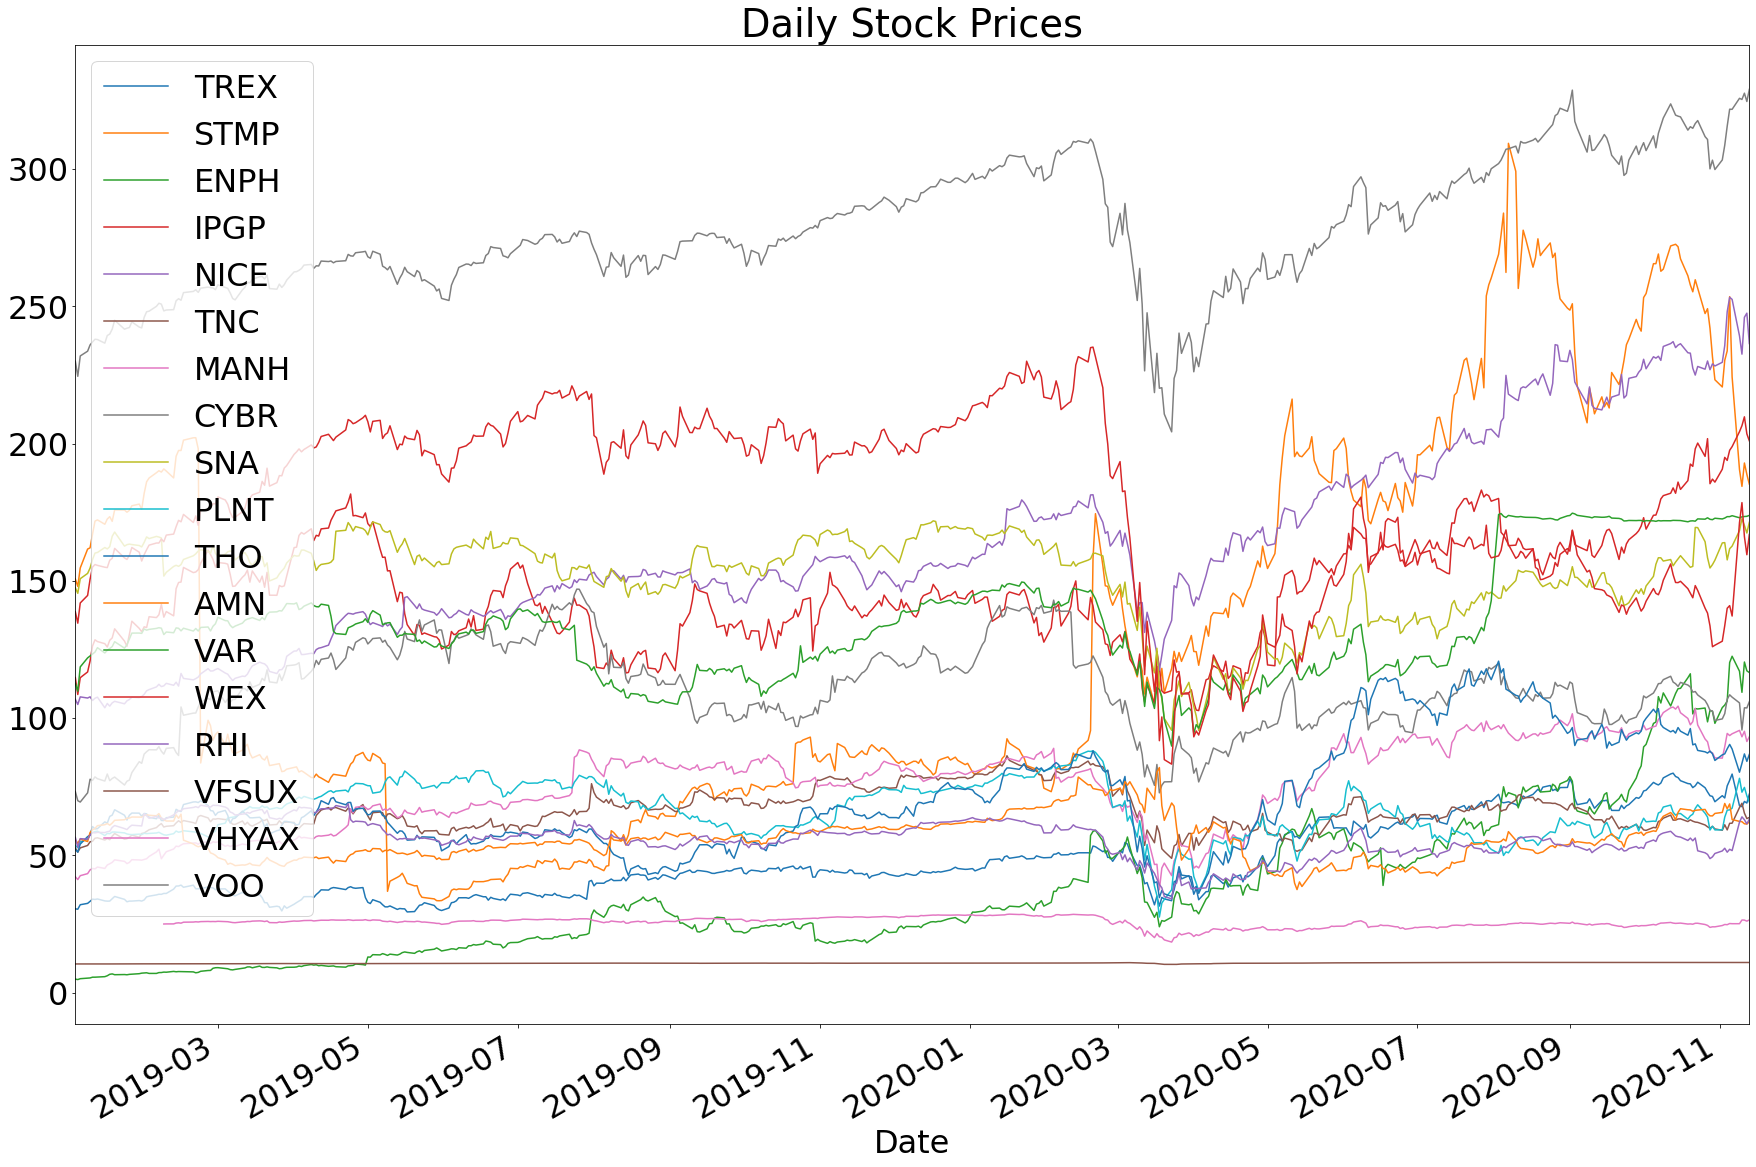

In [44]:
# We are importing a table
import matplotlib.pyplot as plt
# demensions of the table
plt.rcParams.update({'font.size': 32})
# size of the table
fig, ax = plt.subplots(figsize = (30,20))
close_data.plot.line(ax = ax, legend = True)
# Creating the title
plt.title("Daily Stock Prices")
plt.show()
plt.close()

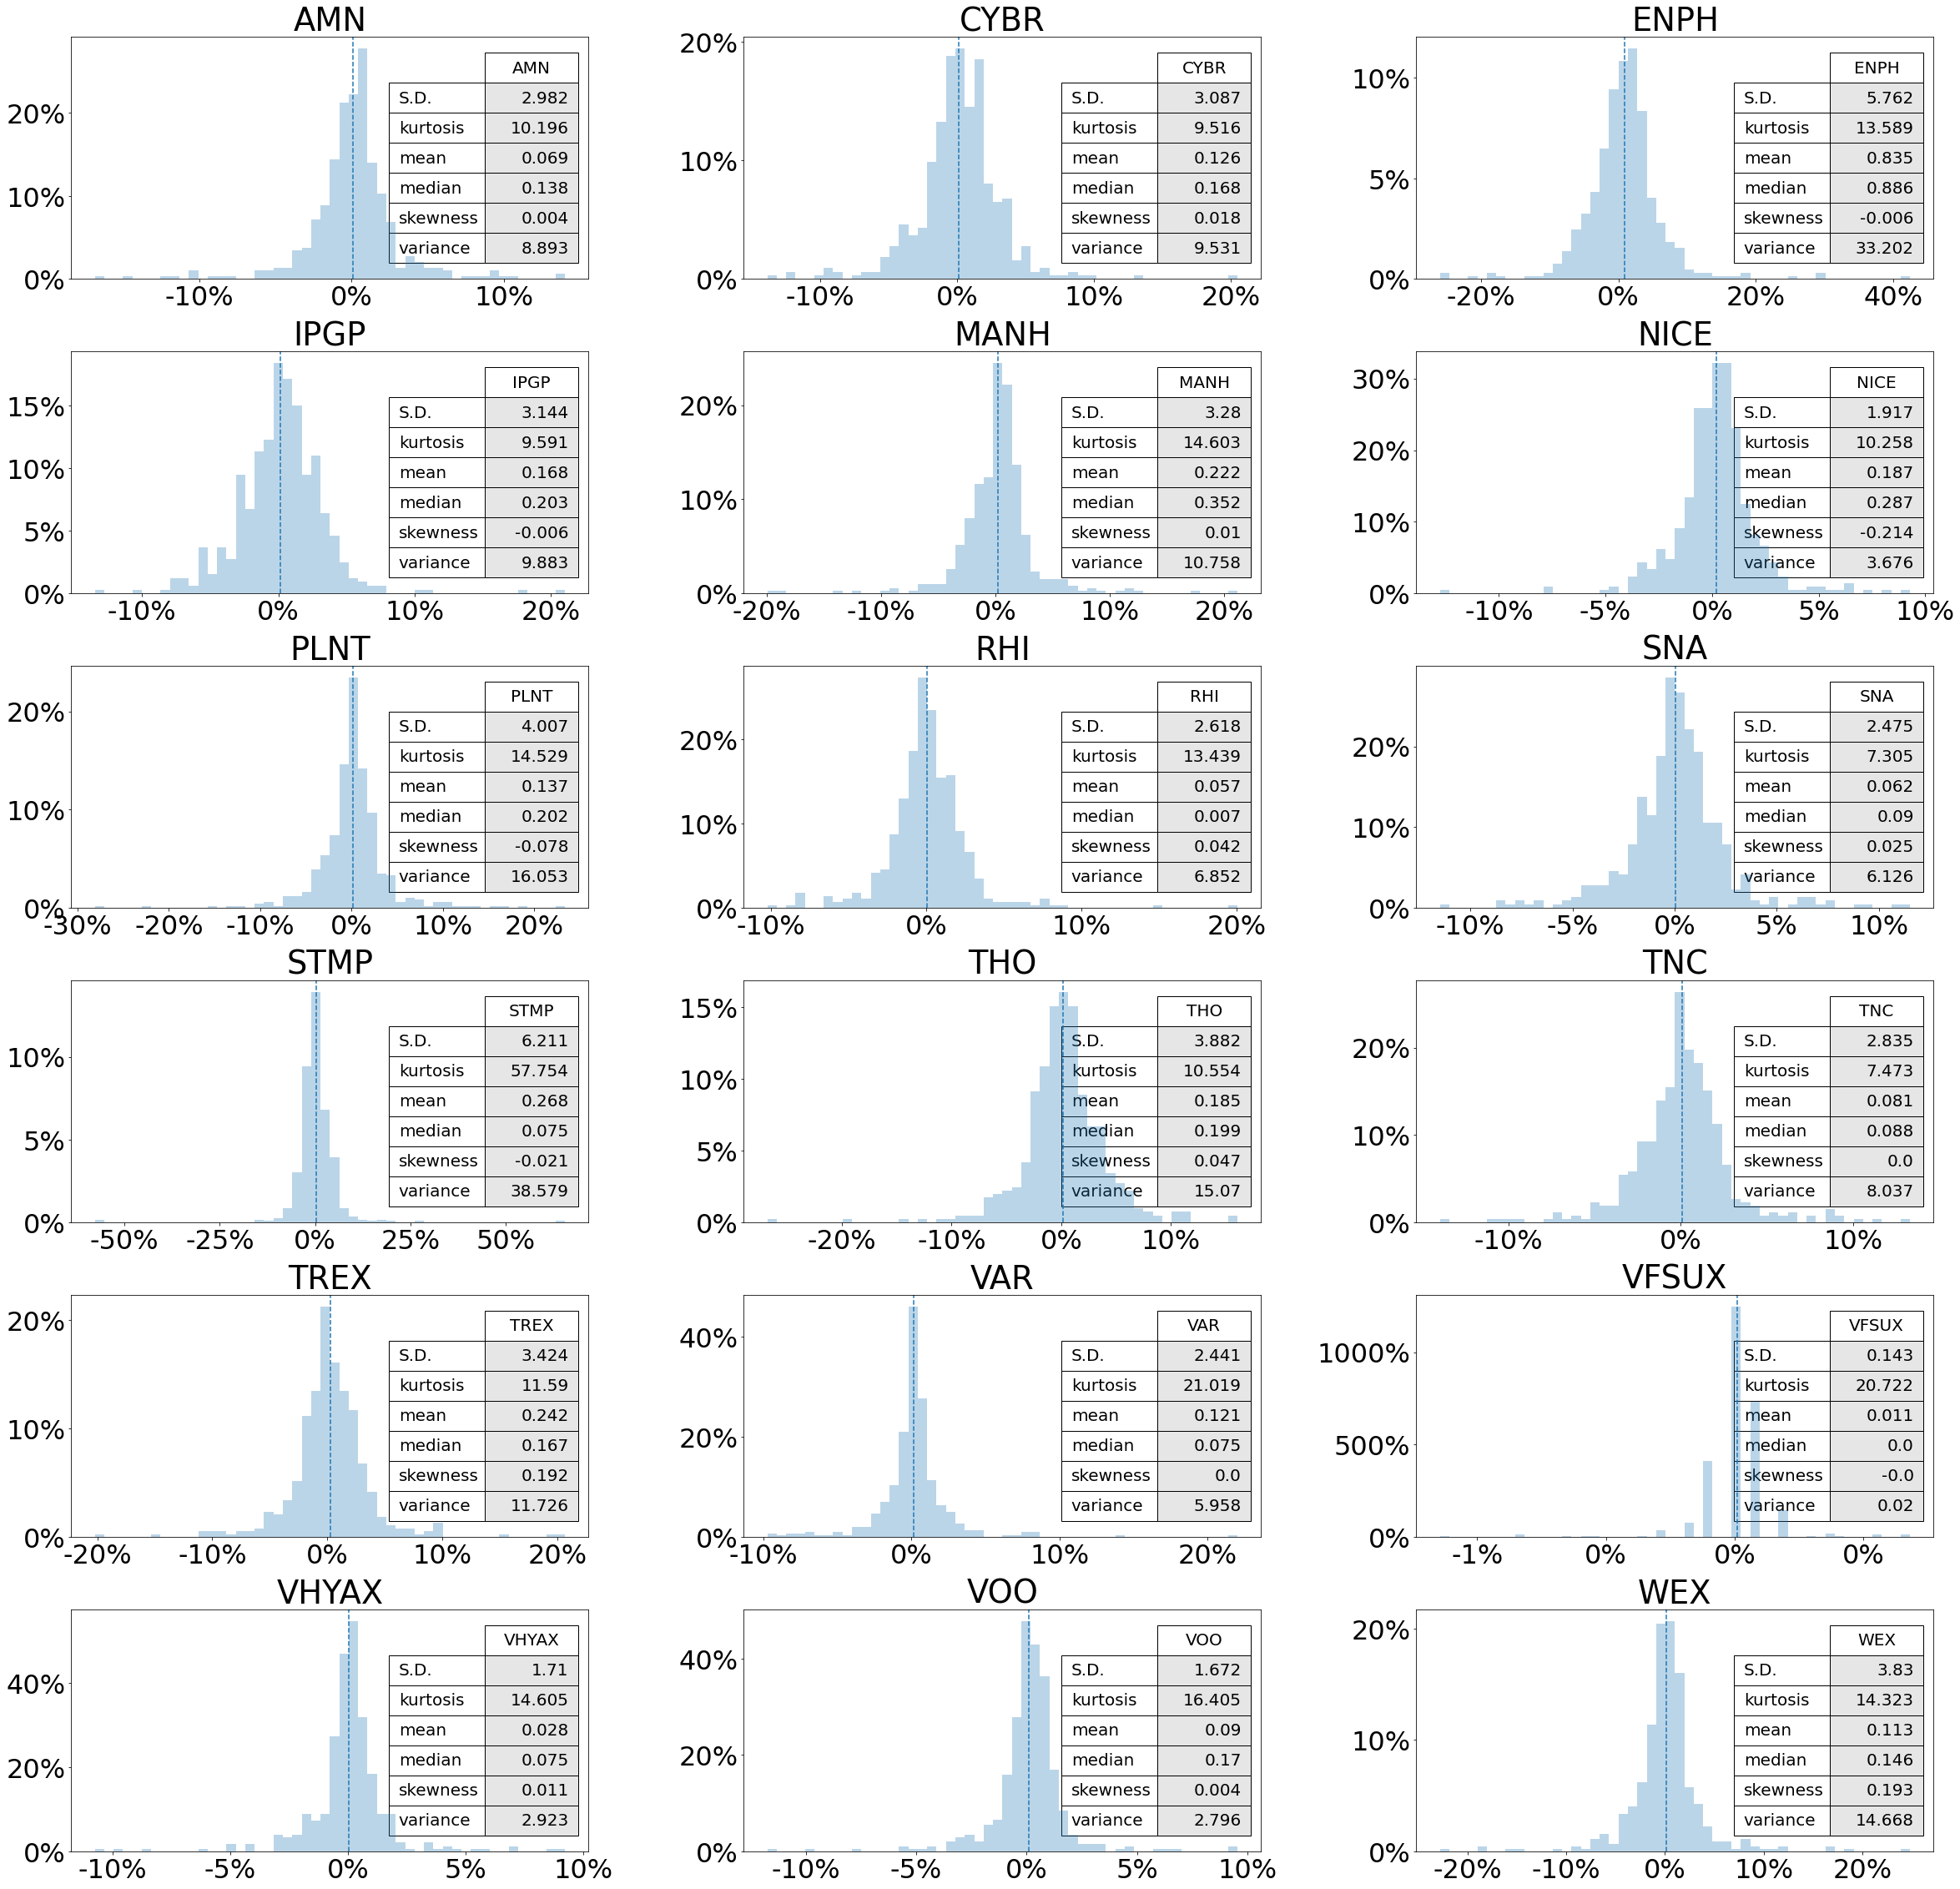

In [45]:
# importing data templates
from pandas.plotting import table

fig, ax = plt.subplots(6,3, figsize = (40,40))
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# organizing our data to be shown in one image
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        hist_data = stats_df[stock]
        # Demensions of our images
        stats =table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        # Size of images
        stats.scale(1.8,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
         # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn off grid lines
        a.grid(False)

   
plt.show()

In [46]:
 import numpy as np
 import pandas as pd
 #used to grab the stock prices, with yahoo
 import pandas_datareader as web
 from datetime import datetime
 #to visualize the results
 import matplotlib.pyplot as plt
 import seaborn
 
 #select start date for correlation window as well as list of tickers
 start = datetime(2017, 1, 1)
 symbols_list = ["TREX", "STMP", "ENPH", "IPGP", "NICE", "TNC", "MANH", "CYBR", "SNA", 
          "PLNT", "THO", "AMN", "VAR", "WEX", "RHI", "VFSUX", "VHYAX", "VOO"]

In [47]:
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]

In [48]:
 df_pivot = df.pivot('Date','Symbol','Close').reset_index()
 df_pivot.head()

Symbol,Date,AMN,CYBR,ENPH,IPGP,MANH,NICE,PLNT,RHI,SNA,STMP,THO,TNC,TREX,VAR,VFSUX,VHYAX,VOO,WEX
0,2017-01-03,39.200001,46.160000,1.05,98.779999,54.650002,68.610001,20.190001,49.759998,171.149994,114.849998,100.480003,72.599998,16.782499,79.517288,10.63,NaN,206.740005,112.239998
1,2017-01-04,39.400002,46.980000,1.15,100.070000,55.230000,68.660004,20.209999,50.910000,172.770004,115.900002,103.570000,74.150002,17.315001,78.166862,10.63,NaN,207.960007,113.160004
2,2017-01-05,38.299999,47.660000,1.12,95.910004,54.880001,68.459999,20.110001,48.599998,171.699997,114.500000,101.690002,71.650002,16.782499,77.886261,10.65,NaN,207.800003,113.629997
3,2017-01-06,37.750000,48.439999,1.11,95.150002,53.869999,69.150002,20.090000,48.299999,173.190002,114.500000,102.169998,71.250000,16.732500,78.228249,10.64,NaN,208.610001,113.400002
4,2017-01-09,38.200001,49.720001,1.11,97.820000,49.669998,69.129997,19.959999,48.349998,173.990005,114.349998,101.059998,70.800003,16.830000,78.543930,10.65,NaN,207.949997,112.730003


In [49]:
corr_df = df_pivot.corr(method='pearson')
 #reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.head(10)

Symbol,AMN,CYBR,ENPH,IPGP,MANH,NICE,PLNT,RHI,SNA,STMP,THO,TNC,TREX,VAR,VFSUX,VHYAX,VOO,WEX
Symbol,,,,,,,,,,,,,,,,,,
AMN,1.000000,0.463450,0.364090,0.130257,0.321879,0.493134,0.619042,0.474257,-0.072510,0.065012,-0.350373,0.112867,0.491288,0.573438,-0.084348,0.275584,0.585531,0.619205
CYBR,0.463450,1.000000,0.577973,-0.368328,0.785450,0.774229,0.935502,0.238988,-0.148991,-0.462000,-0.658262,-0.071245,0.676826,0.650463,0.397299,0.703586,0.761382,0.717345
ENPH,0.364090,0.577973,1.000000,-0.092091,0.840622,0.928110,0.524521,-0.125290,-0.354893,0.157113,-0.176401,-0.169746,0.913327,0.717690,0.752412,-0.308255,0.788054,0.156801
IPGP,0.130257,-0.368328,-0.092091,1.000000,-0.234938,-0.116966,-0.208545,0.316511,0.121494,0.596868,0.663569,0.200553,-0.030130,0.173580,-0.158895,0.077881,0.077910,0.038141
MANH,0.321879,0.785450,0.840622,-0.234938,1.000000,0.910474,0.695936,0.016223,-0.144415,-0.145715,-0.288780,0.036606,0.873483,0.663590,0.776426,0.201773,0.863983,0.457825
NICE,0.493134,0.774229,0.928110,-0.116966,0.910474,1.000000,0.751425,0.077898,-0.335691,0.038309,-0.332572,-0.124159,0.966967,0.802152,0.656856,-0.172089,0.916373,0.436667
PLNT,0.619042,0.935502,0.524521,-0.208545,0.695936,0.751425,1.000000,0.416245,-0.116408,-0.343104,-0.620782,-0.073866,0.676705,0.690200,0.241223,0.757772,0.796459,0.818596
RHI,0.474257,0.238988,-0.125290,0.316511,0.016223,0.077898,0.416245,1.000000,0.478026,0.200093,-0.080166,0.348195,0.160604,0.329895,-0.423810,0.775728,0.351179,0.719404
SNA,-0.072510,-0.148991,-0.354893,0.121494,-0.144415,-0.335691,-0.116408,0.478026,1.000000,-0.052927,0.286270,0.478585,-0.276595,-0.083589,-0.200756,0.877589,-0.062884,0.223657


C:\Users\Dylan\Code\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Dylan\Code\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Dylan\Code\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Dylan\Code\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum at

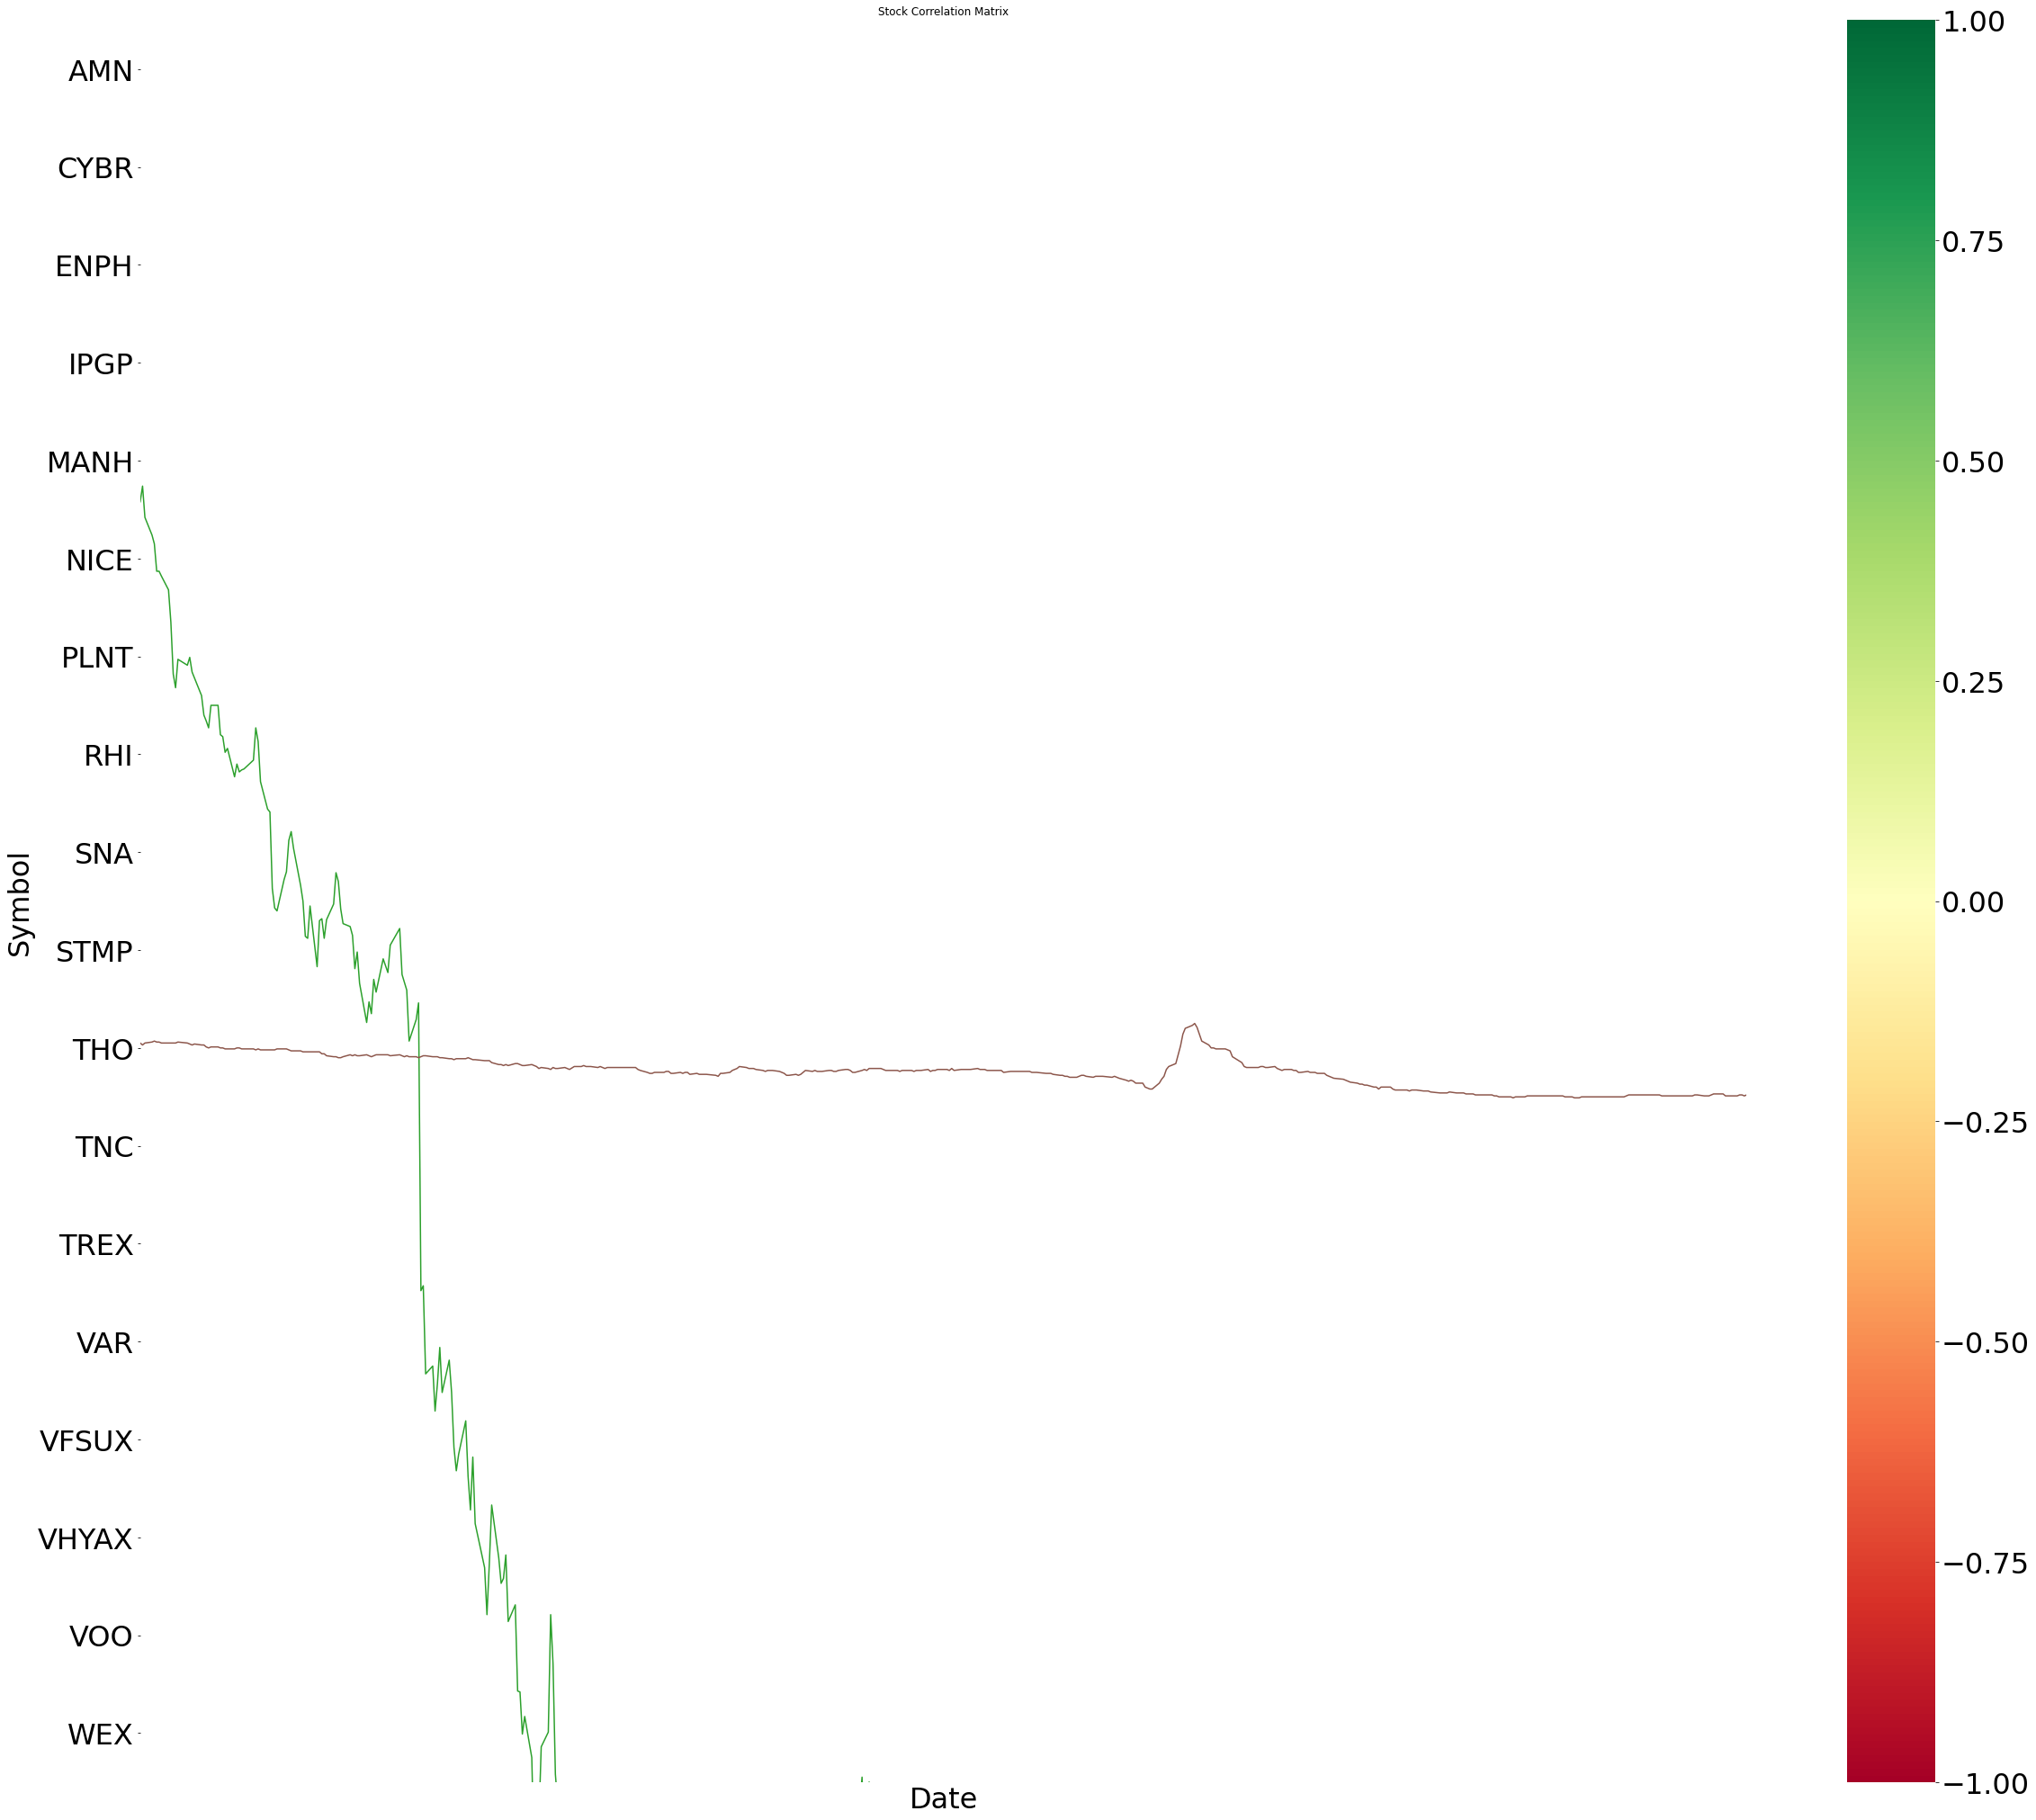

In [50]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(1,1, figsize = (40,40))
# generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=1)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
close_data.plot.line(ax = ax, legend = False)
plt.rcParams.update({'font.size': 10})
# Creating the title
plt.title("Stock Correlation Matrix")
plt.show()